In [1]:
print('Computational Applied Statistics - Assignment #4 part 2 \nEtienne Bayard, 2018-05-12 \n')

# Digit learning challenge
# Use the methods taught in the course, or a good combination of the methods taught in the course to predict all 10 digits of the zipcode data. Only use ziptrain.csv data to build your model, and evaluate the accuracy of your model on ziptest.csv

# Using numpy library for data importation
import numpy as np

# Assign the filenames: file_train and file_test
path = 'C:/Users/User/Desktop/data/'
filetrain = path + 'ziptrain.csv'
filetest = path + 'ziptest.csv'

# Read the files into a numpy arrays: data_train and data_test
data_train = np.loadtxt(filetrain)
data_test = np.loadtxt(filetest)

# Define the datasets for training and testing from the imported data
X_train = data_train[:,1:257]
y_train = data_train[:,0]
X_test = data_test[:,1:257]
y_test = data_test[:,0]

# Now that we have found support vector machine to be the best classifier, we will try to play with this algorithm's parameters to see if we can get a better classification than with default parameters.
print('Now that we have found support vector machine to be the best classifier, we will try to play with this algorithm s parameters to see if we can get a better classification than with default parameters.')

# For a quick assessment of prediction performance on the train set, we'll be using the cross validation score (k fold cross-validation k=10)
from sklearn.model_selection import cross_val_score

# For a quick assessment of prediction performance on the test set, we'll be using the accuracy score
from sklearn.metrics import accuracy_score

# To assess the computing cost of each method, we'll time the calculations:
import timeit

Computational Applied Statistics - Assignment #4 part 2 
Etienne Bayard, 2018-05-12 

Now that we have found support vector machine to be the best classifier, we will try to play with this algorithm s parameters to see if we can get a better classification than with default parameters.


In [2]:
# Support Vector Machine, optimize C parameter

start_svmc = timeit.default_timer()

from sklearn.svm import SVC
paths_m = []
paths_cvs = []
paths_as = []
for m in range(1,100,1):
	sv = SVC(C=m/2)
	sv.fit(X_train,y_train)

	cvs_sv = cross_val_score(sv, X_train, y_train, cv=10).mean()

	# We now apply our predictive model on the test data (X_test) 
	y_test_pred = sv.predict(X_test)
	as_sv = accuracy_score(y_test, y_test_pred)

	paths_m.append(m/2)
	paths_cvs.append(cvs_sv)
	paths_as.append(as_sv)

stop_svmc = timeit.default_timer()
time_svmc = stop_svmc - start_svmc

In [3]:
print(time_svmc)

4960.801998933333


Text(0.5,1,'Cross validation performance')

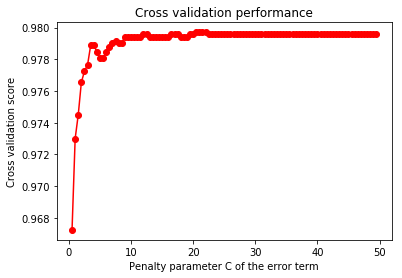

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# print the graph showing confusion cross validation following 'C'
plt.plot(paths_m, paths_cvs, '-ro')
plt.xlabel('Penalty parameter C of the error term')
plt.ylabel('Cross validation score')
plt.title('Cross validation performance')

Text(0.5,1,'Prediction accuracy')

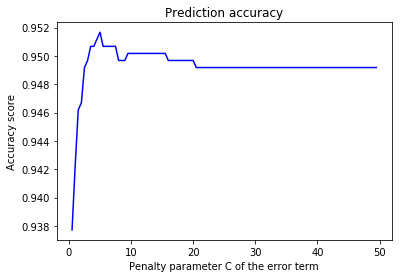

In [5]:
# print the graph showing accuracy score following 'C'
plt.plot(paths_m, paths_as, '-b')
plt.xlabel('Penalty parameter C of the error term')
plt.ylabel('Accuracy score')
plt.title('Prediction accuracy')

In [6]:
# Getting the position of the maximum accuracy score to tell what C parameter is optimal
print((np.argmax(paths_as)+1)/2)

5.0


In [7]:
#Now that we know that C=5 seems to give the optimal accuracy at about 95.2%, let's play with the Gamma parameter.
print('Now that we know that C=5 seems to give the optimal accuracy at about 95.2%, we play with the Gamma parameter.')

# Preliminary spot checks seems to show that optimal Gamma is between 1/150 and 1/50, so we will run between these 2 boundaries.
print('Preliminary spot checks seems to show that optimal Gamma is between 1/150 and 1/50, so we will run between these 2 boundaries.')

Now that we know that C=5 seems to give the optimal accuracy at about 95.2%, we play with the Gamma parameter.
Preliminary spot checks seems to show that optimal Gamma is between 1/150 and 1/50, so we will run between these 2 boundaries.


In [8]:
# Support Vector Machine, optimize Gamma parameter

start_svmg = timeit.default_timer()

from sklearn.svm import SVC
paths_m = []
paths_cvs = []
paths_as = []
for m in range(1,101,1):
	sv = SVC(C=5, gamma=1/(151-m))
	sv.fit(X_train,y_train)

	cvs_sv = cross_val_score(sv, X_train, y_train, cv=10).mean()

	# We now apply our predictive model on the test data (X_test) 
	y_test_pred = sv.predict(X_test)
	as_sv = accuracy_score(y_test, y_test_pred)

	paths_m.append(1/(151-m))
	paths_cvs.append(cvs_sv)
	paths_as.append(as_sv)

stop_svmg = timeit.default_timer()
time_svmg = stop_svmg - start_svmg

In [9]:
print(time_svmg)

10231.27340672


Text(0.5,1,'Cross validation performance')

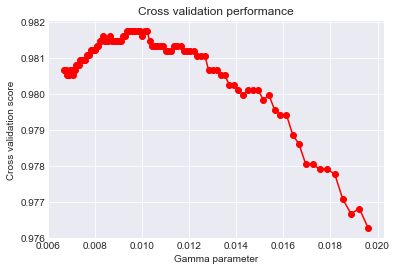

In [10]:
#print the graph showing confusion cross validation following 'Gamma' while using seaborn
import seaborn as sns 
sns.set_style("darkgrid")

plt.plot(paths_m, paths_cvs, '-ro')
plt.xlabel('Gamma parameter')
plt.ylabel('Cross validation score')
plt.title('Cross validation performance')

Text(0.5,1,'Prediction accuracy')

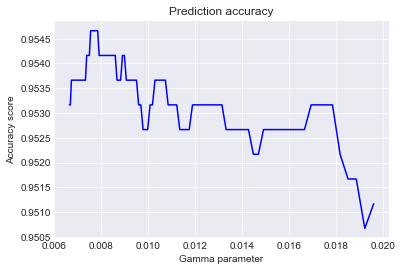

In [11]:
#print the graph showing accuracy score following 'Gamma'
plt.plot(paths_m, paths_as, '-b')
plt.xlabel('Gamma parameter')
plt.ylabel('Accuracy score')
plt.title('Prediction accuracy')

In [12]:
# Getting the position of the maximum accuracy score to tell what Gamma parameter is optimal
print(np.argmax(paths_as), 1/(151-np.argmax(paths_as)))

18 0.00751879699248


In [13]:
# What is the accuracy ratio for our optimal paramaters C=5 & Gamma=1/133
print(np.max(paths_as))

0.954658694569


In [14]:
# Another parameter we could play upon is the kernel function, but since these trials are very demanding for my computer, 
# I might try to find advise on the web:
# http://www.primaryobjects.com/2014/01/09/classifying-handwritten-digits-with-machine-learning/
# https://github.com/ksopyla/svm_mnist_digit_classification
# These links tend to indicate that the default RBF (radial basis function) kernel is adequate, so we will stick to that.

In [15]:
# We will now do a grid search around the parameters C=5 and Gamma = 0.00752
start_svmgrid = timeit.default_timer()

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid={'C': [4.80,4.85,4.90,4.95,5.0,5.05,5.10,5.15,5.20,5.25], 'gamma':[0.0055,0.0060,0.0065,0.0070,0.00752,0.0080,0.0085,0.0090,0.0095,0.0100]})
grid.fit(X_train,y_train)

stop_svmgrid = timeit.default_timer()
time_svmgrid = stop_svmgrid - start_svmgrid

In [16]:
print(time_svmgrid)

2694.781863253338


In [17]:
y_test_pred_grid = grid.predict(X_test)
as_svgrid = accuracy_score(y_test, y_test_pred_grid)
print(as_svgrid)

0.952665670154


In [18]:
print(grid.best_estimator_)

SVC(C=4.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [19]:
# The grid search, given optimization on the training set, does not yield better results than what we found previously while optimizing on the test set. Additionally, it does not converge near what we found previously as we could have predicted while optimizing cross validation performance on the training set.
print('The grid search, given optimization on the training set, does not yield better results than what we found previously while optimizing on the test set. Additionally, it does not converge near what we found previously as we could have predicted while optimizing cross validation performance on the training set.')

# We then keep the Support Vector Machine with parameters C=5 & Gamma=1/133 as our best performance on the test set with a 0.954658694569 accuracy ratio.
print('We then keep the Support Vector Machine with parameters C=5 & Gamma=1/133 as our best performance on the test set with a 0.954658694569 accuracy ratio.')


The grid search, given optimization on the training set, does not yield better results than what we found previously while optimizing on the test set. Additionally, it does not converge near what we found previously as we could have predicted while optimizing cross validation performance on the training set.
We then keep the Support Vector Machine with parameters C=5 & Gamma=1/133 as our best performance on the test set with a 0.954658694569 accuracy ratio.


In [20]:
# Support Vector Machine with best C & Gamma parameters found

# Start timer
start_sv = timeit.default_timer()

# Import the support vector machine model from the Scikit-learn library and run the algorithm
from sklearn.svm import SVC
sv = SVC(C=5, gamma = (1/133))
sv.fit(X_train,y_train)

cvs_sv = cross_val_score(sv, X_train, y_train, cv=10).mean()

# We now apply our predictive model on the test data (X_test)  
y_test_pred = sv.predict(X_test)
as_sv = accuracy_score(y_test, y_test_pred)

# Stop timer and calculate computing time in seconds
stop_sv = timeit.default_timer()
time_sv = stop_sv - start_sv

In [21]:
# Creating a pandas dataframe summarizing this.
resume = [('Support Vector Machine', cvs_sv, as_sv, time_sv)]
labels = [ 'Method', 'Cross validation score on training set', 'Accuracy score on test set', 'Computing time (s)']

import pandas as pd
df = pd.DataFrame(resume, columns=labels)
print(df)

                   Method  Cross validation score on training set  \
0  Support Vector Machine                                0.980946   

   Accuracy score on test set  Computing time (s)  
0                     0.95416           65.714168  
